In [10]:
import pandas as pd
import numpy as np
from sklearn.externals import joblib
import scikitplot.plotters as skplt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import imblearn.pipeline as pl
from scikitplot import classifier_factory
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import RandomizedLasso
from sklearn.utils import class_weight
import warnings; warnings.simplefilter('ignore')
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [11]:
labels = pd.read_csv('./labels2.csv', index_col=0)
pts = pd.read_csv('./pts.csv', index_col=0)

In [ ]:
# For determining Ch 5 features
summit_data = pts[pts['system_id'] == 3]
summit_labels = labels[pts['system_id'] == 3]
summit_data = summit_data.drop([
'min_nnz_row.1',
'system_id',
'matrix_id', 
'status_id', 
'time', 
'HPL_Tflops',        
'StarDGEMM_Gflops',                        
'SingleDGEMM_Gflops',                      
'PTRANS_GBs',                              
'MPIRandomAccess_LCG_GUPs',                
'MPIRandomAccess_GUPs',                    
'StarRandomAccess_LCG_GUPs',               
'SingleRandomAccess_LCG_GUPs',             
'StarRandomAccess_GUPs',                   
'SingleRandomAccess_GUPs',                 
'StarSTREAM_Copy',                         
'StarSTREAM_Scale',                        
'StarSTREAM_Add',                          
'StarSTREAM_Triad',                        
'SingleSTREAM_Copy',                       
'SingleSTREAM_Scale',                      
'SingleSTREAM_Add',                        
'SingleSTREAM_Triad',                      
'StarFFT_Gflops',                          
'SingleFFT_Gflops',                        
'MPIFFT_Gflops',                           
'MaxPingPongLatency_usec',                 
'RandomlyOrderedRingLatency_usec',         
'MinPingPongBandwidth_GBytes',             
'NaturallyOrderedRingBandwidth_GBytes',    
'RandomlyOrderedRingBandwidth_GBytes',     
'MinPingPongLatency_usec',                 
'AvgPingPongLatency_usec',                 
'MaxPingPongBandwidth_GBytes',             
'AvgPingPongBandwidth_GBytes',             
'NaturallyOrderedRingLatency_usec',        
'MemProc',                                
'core_count',                              
'cpu_freq',                                
'bogo_mips',                              
'l1_cache',                                
'l2_cache',                                
'l3_cache',                                
'memory_size',                             
'memory_freq',                             
'memory_type'], axis=1)

summit_data.info()

X = summit_data.as_matrix()
y = summit_labels.as_matrix()
clfLasso = RandomizedLasso()
clfLasso.fit(X,y[:,7])
for i,j in zip(summit_data.columns, clfLasso.scores_):
    print(i,j)

In [ ]:
# For determining Ch 6 features
ch6_data = pts[pts['np'] == 4]
ch6_labels = labels[pts['np'] == 4]
ch6_data = ch6_data.drop([
'min_nnz_row.1',
'np',
'matrix_id', 
'status_id',
'system_id',
'time'], axis=1)

ch6_data.info()

X = ch6_data.as_matrix()
y = ch6_labels.as_matrix()
clfLasso = RandomizedLasso()
clfLasso.fit(X,y[:,15]) # The 25% threshold, specific to each np and sys
for i,j in zip(ch6_data.columns, clfLasso.scores_):
    print(i,j)

In [ ]:
# For determining Ch 7 features
ch7_data = pts
ch7_labels = labels
ch7_data = ch7_data.drop([
'min_nnz_row.1',
'matrix_id', 
'status_id',
'system_id',
'core_count',
'time'], axis=1)

ch7_data.info()

X = ch7_data.as_matrix()
y = ch7_labels.as_matrix()
clfLasso = RandomizedLasso()    
for num in range(0,18):
    print('\n', num)
    clfLasso.fit(X,y[:,num]) # The 25% threshold, specific to each np and sys
    for i,j in zip(ch7_data.columns, clfLasso.scores_):
        print(i,j)

In [12]:
# Adding in Cavity flow stuff for Ch8 predictions
cavity_flow = pd.read_csv('./cavity_flow_pts.csv', 
                          header=0, index_col=0)
cavity_flow_results = pd.read_csv('./labels_cavity.csv', 
                                 header=0, index_col=0)
cavity_flow = cavity_flow.drop([
'matrix_id',
'system_id',
'time',
'min_nnz_row.1',
'status_id'], axis=1)

ch8_data = pts
ch8_labels = labels
ch8_data = ch8_data.drop([
'matrix_id', 
'system_id',
'min_nnz_row.1',
'time',
'status_id'], axis=1)

(871535, 78) (871535, 18)
(2520, 78) (2520, 18)
44.54063296318054


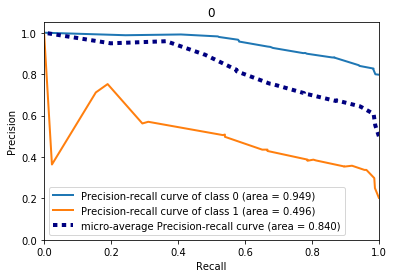

38.23482036590576


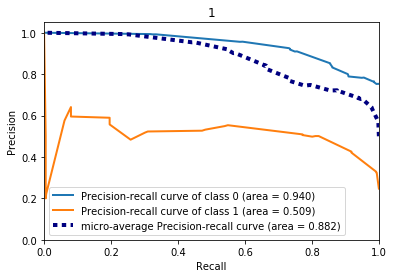

27.765143632888794


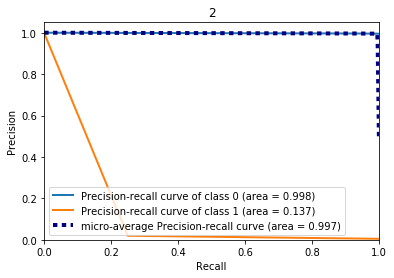

27.556966304779053


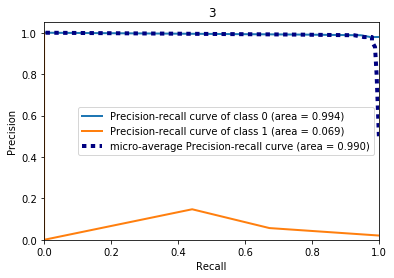

27.794955253601074


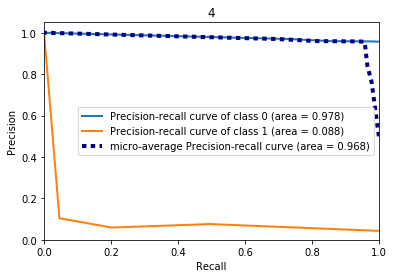

30.850618600845337


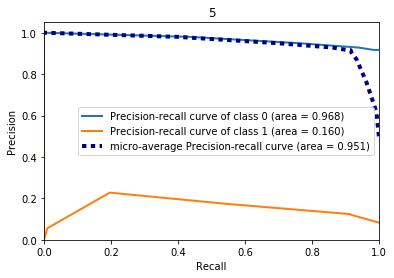

26.231040477752686


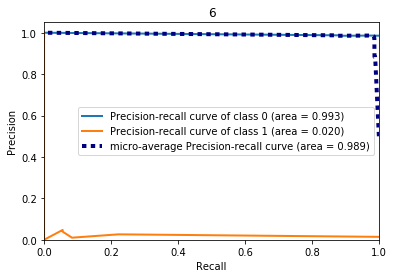

36.652111530303955


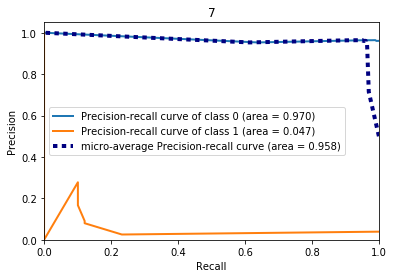

32.23186445236206


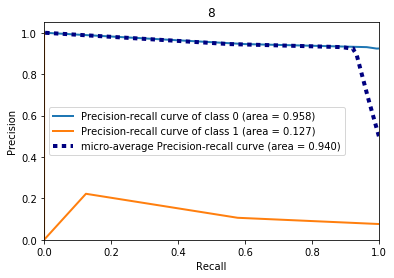

31.882317781448364


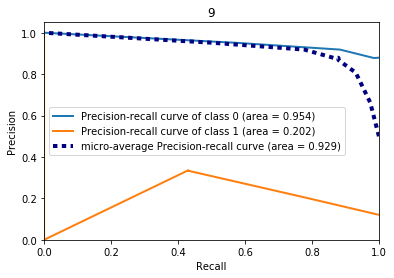

34.608999252319336


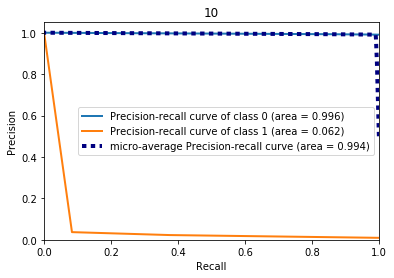

32.691163301467896


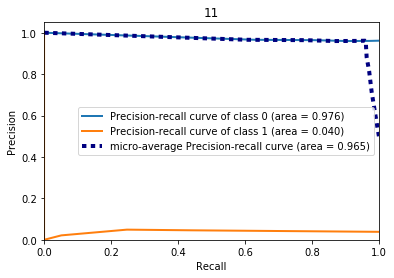

32.4729061126709


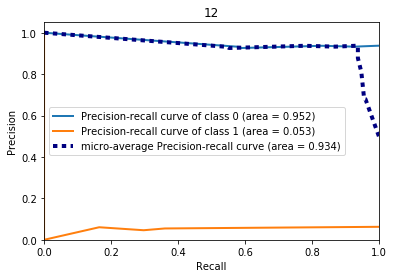

33.0370831489563


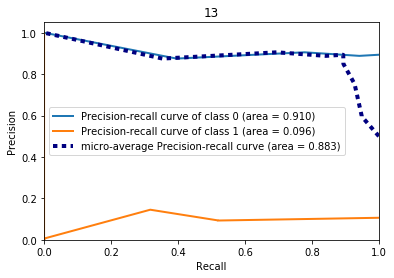

36.58794903755188


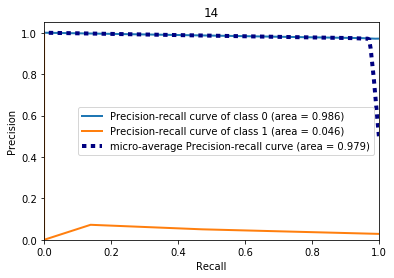

35.877370834350586


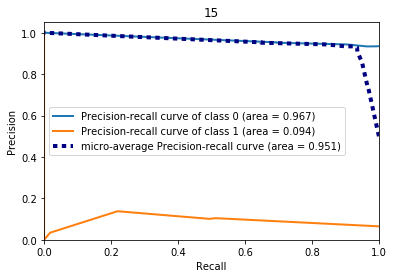

37.00289058685303


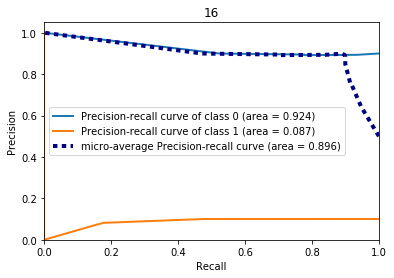

31.35710048675537


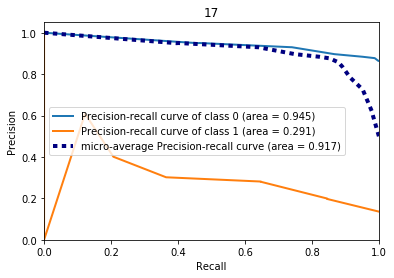

In [42]:
# Trains on UF matrices and tests on cavity flow
X = ch8_data.as_matrix()
y = ch8_labels.as_matrix()
print(X.shape, y.shape)
print(cavity_flow.shape, cavity_flow_results.shape)
for i in range(0,18):
    clf = RandomForestClassifier()
    start_time = time.time()
    clf = clf.fit(X, y[:,i])
    #a = pd.DataFrame(clf.predict(cavity_flow))
    a = clf.predict_proba(cavity_flow)
    #skplt.plot_confusion_matrix(cavity_flow_results.iloc[:,i], a)
    skplt.plot_precision_recall_curve(cavity_flow_results.iloc[:,i], a)
    print(time.time()-start_time)
    plt.title(i)
    plt.show()

17.902650117874146


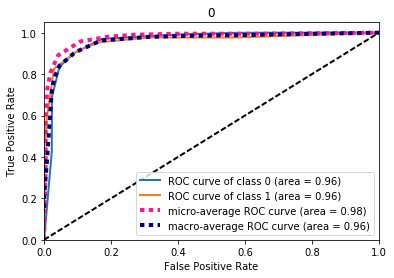

16.003519296646118


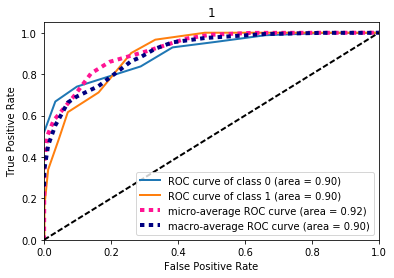

10.209529638290405


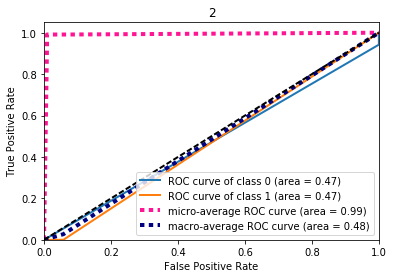

11.382481575012207


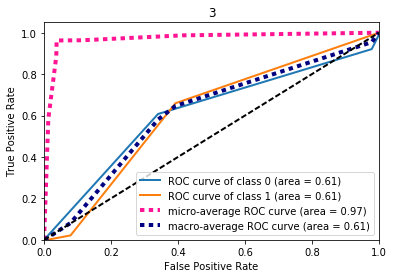

12.858874797821045


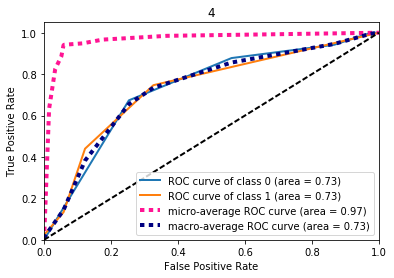

14.26705026626587


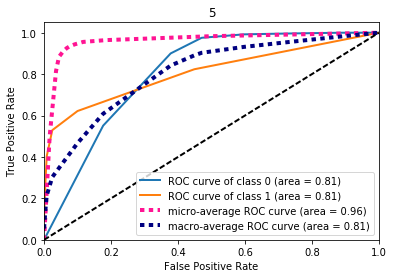

12.33736276626587


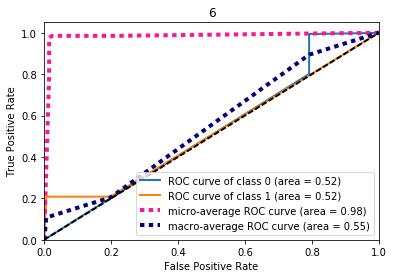

13.290831089019775


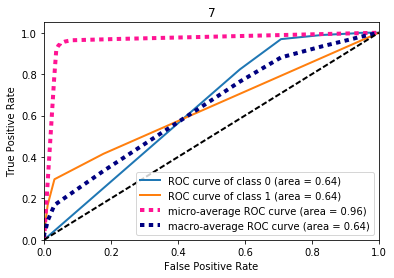

14.495733976364136


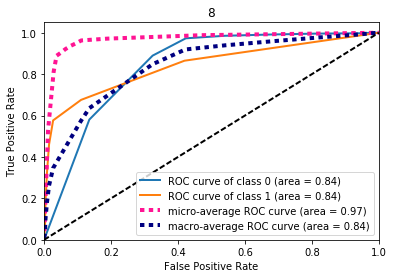

14.887174844741821


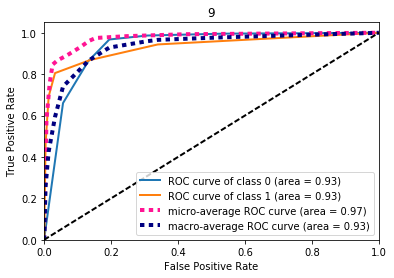

12.100276708602905


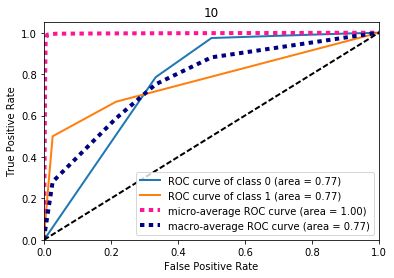

12.354877948760986


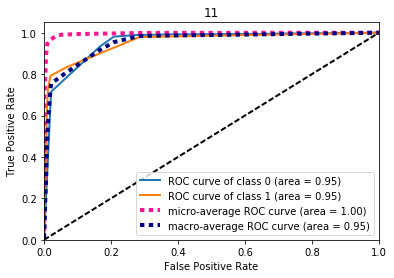

12.155374765396118


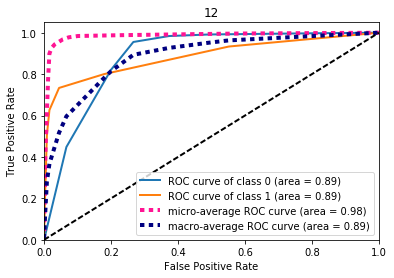

14.72692608833313


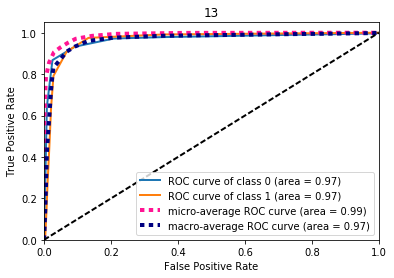

14.335873126983643


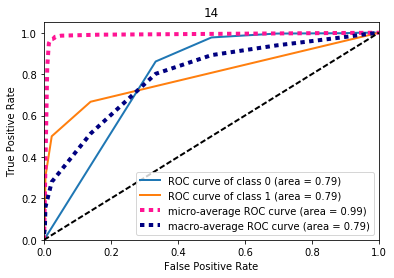

15.395948648452759


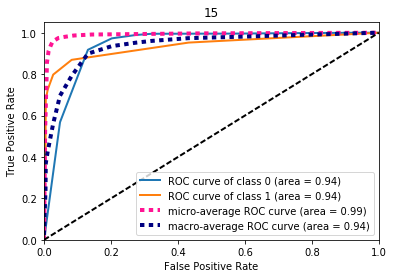

17.169700145721436


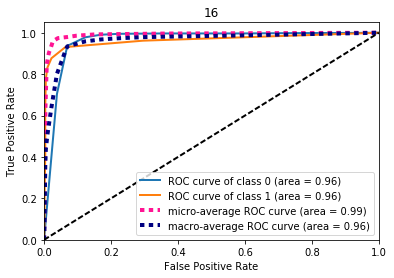

16.928687572479248


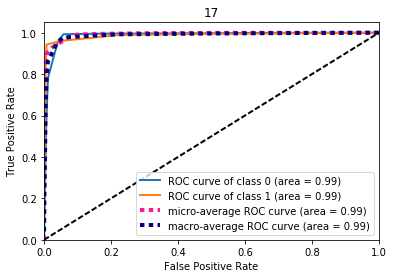

In [63]:
# Trains on UF matrices + half cavity flow and tests 
#   on the other half of cavity flow
# Adding in Cavity flow stuff for Ch8 predictions
X_train = pd.read_csv('./pts+first_half_cavity.csv', 
                          header=0, index_col=0)
y_train = pd.read_csv('./labels2+first_half_cavity.csv', 
                                 header=0, index_col=0)
X_test = pd.read_csv('./cavity_flow_pts_second_half.csv', 
                    header=0, index_col=0)
y_test = pd.read_csv('./labels_cavity_second_half.csv',
                    header=0, index_col=0)


X_train = X_train.drop([
'matrix_id',
'system_id',
'time',
'min_nnz_row.1',
'status_id'], axis=1)
X_test = X_test.drop([
'matrix_id',
'system_id',
'time',
'min_nnz_row.1',
'status_id'], axis=1)

for i in range(0,18):
    clf = RandomForestClassifier()
    start_time = time.time()
    clf = clf.fit(X_train.as_matrix(), y_train.as_matrix()[:,i])
    #a = pd.DataFrame(clf.predict(X_test))
    a = clf.predict_proba(X_test)
    #skplt.plot_confusion_matrix(y_test.as_matrix()[:,i], a)
    #skplt.plot_precision_recall_curve(y_test.iloc[:,i], a)
    skplt.plot_roc_curve(y_test.iloc[:,i], a)
    print(time.time()-start_time)
    plt.title(i)
    plt.show()

1.5008175373077393


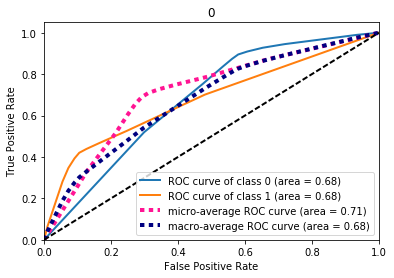

1.5470435619354248


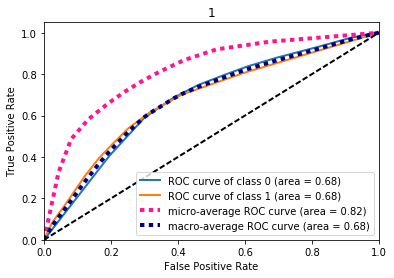

1.2283296585083008


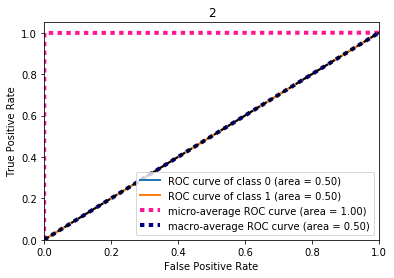

1.5100488662719727


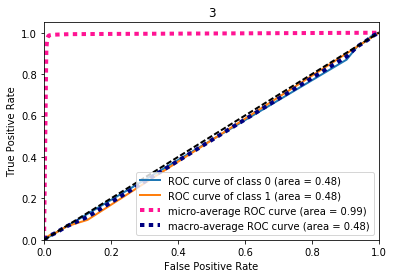

1.391118049621582


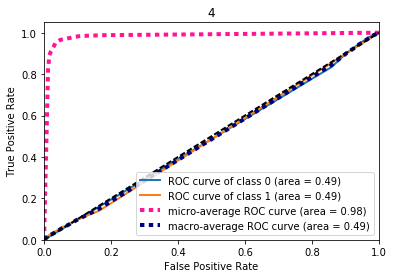

1.5528488159179688


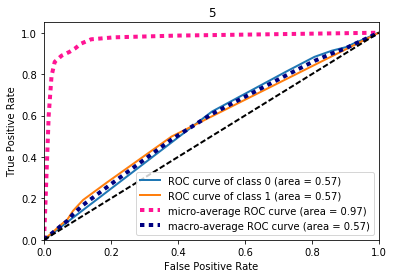

1.332362413406372


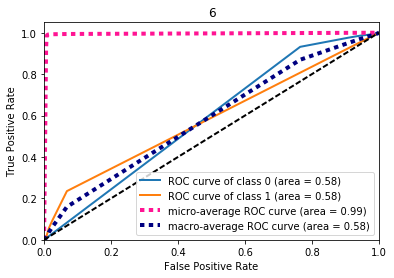

1.8442766666412354


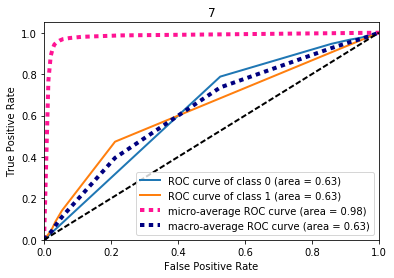

1.4349229335784912


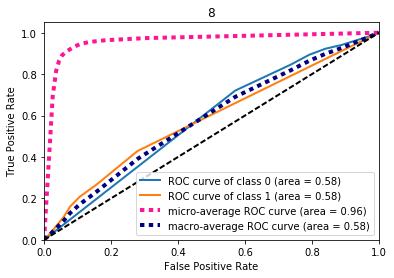

1.467496633529663


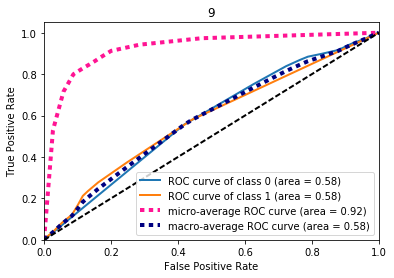

1.347377061843872


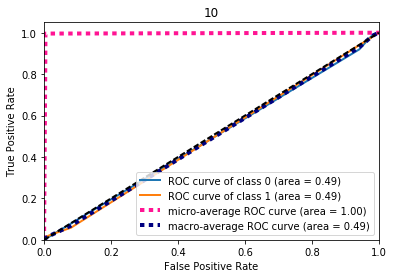

1.3730883598327637


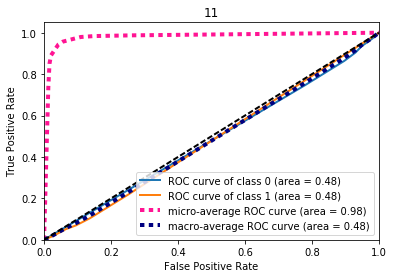

1.6525156497955322


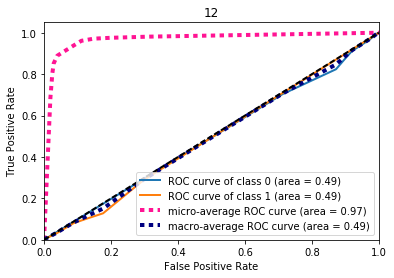

1.8052177429199219


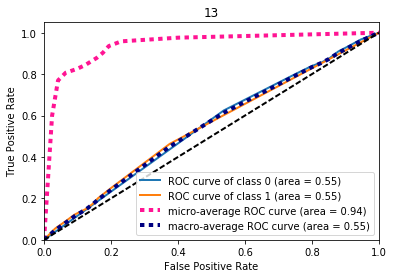

1.3226025104522705


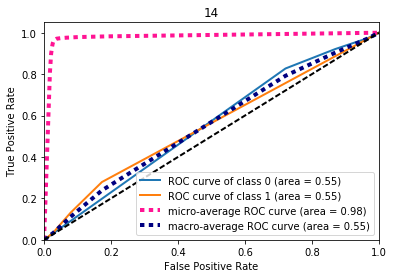

1.4148211479187012


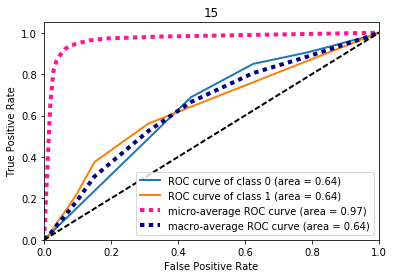

1.4579732418060303


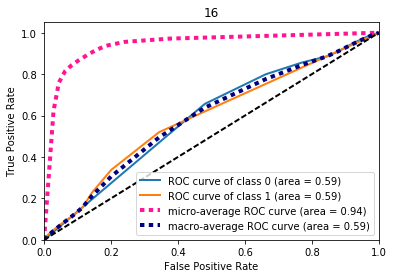

1.4721674919128418


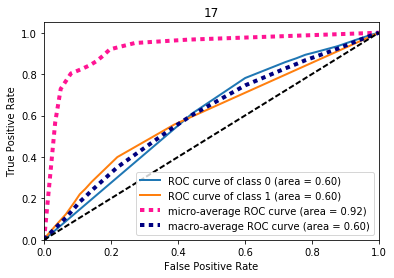

In [57]:
# Trains on cavity data and tests on UF matrices
X = cavity_flow.as_matrix()
y = cavity_flow_results.as_matrix()
for i in range(0,18):
    clf = RandomForestClassifier()
    start_time = time.time()
    clf = clf.fit(X, y[:,i])
    #a = pd.DataFrame(clf.predict(ch8_data))
    a = clf.predict_proba(ch8_data)
    #skplt.plot_confusion_matrix(ch8_labels.iloc[:,i], a)
    skplt.plot_roc_curve(ch8_labels.iloc[:,i], a)
    #skplt.plot_precision_recall_curve(ch8_labels.iloc[:,i], a)
    print(time.time()-start_time)
    plt.title(i)
    plt.show()

0.27037978172302246


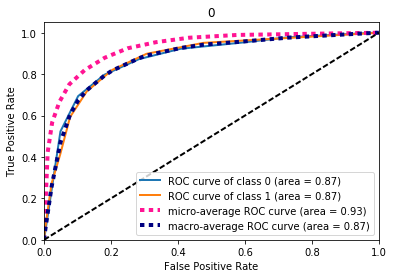

0.15891647338867188


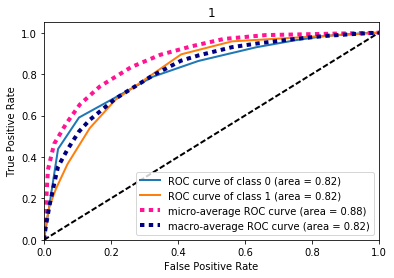

0.14742732048034668


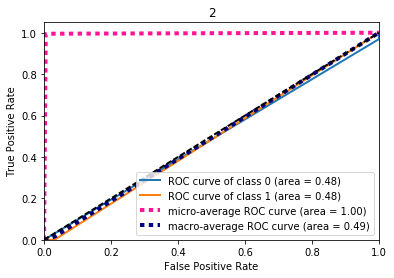

0.13226795196533203


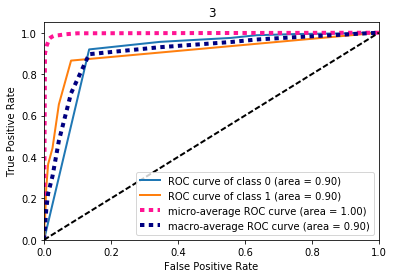

0.1419222354888916


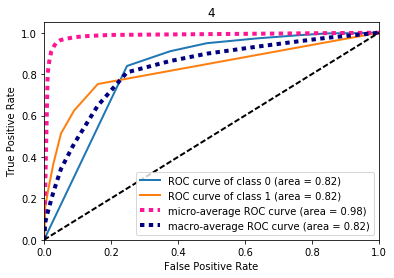

0.14049839973449707


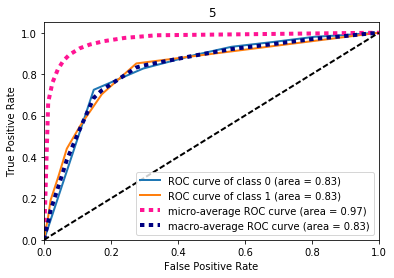

0.13507485389709473


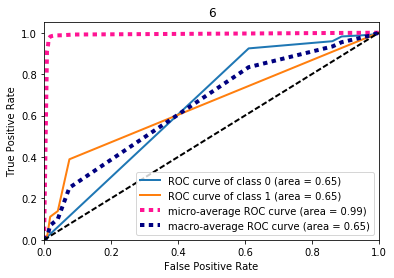

0.15335512161254883


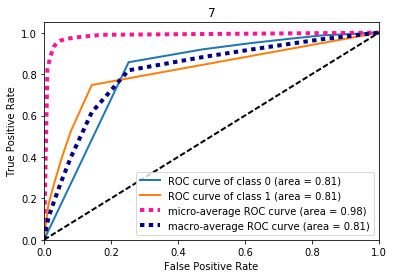

0.1692197322845459


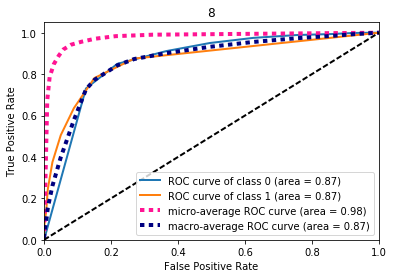

0.18033099174499512


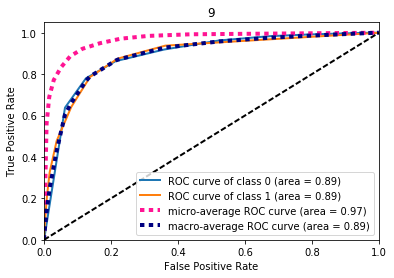

0.5387613773345947


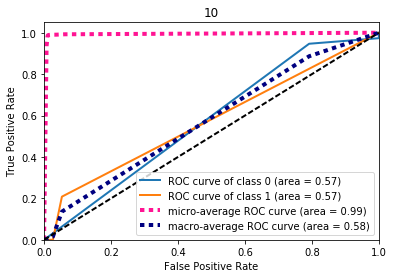

0.211961030960083


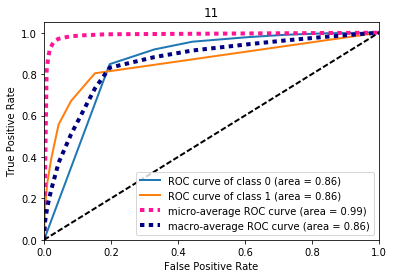

0.23029208183288574


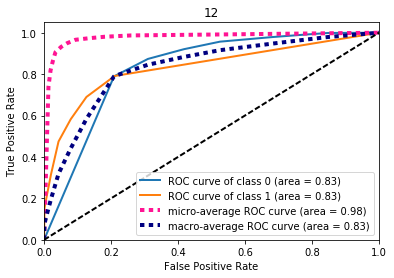

0.17198514938354492


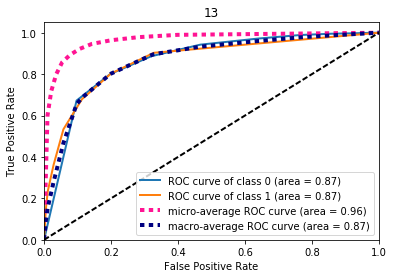

0.1825847625732422


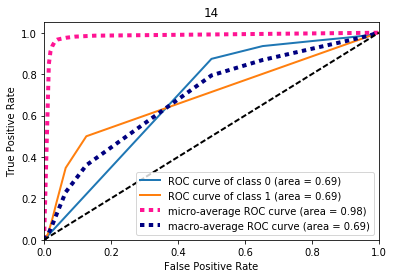

0.15137147903442383


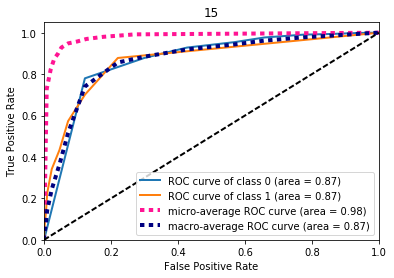

0.14221644401550293


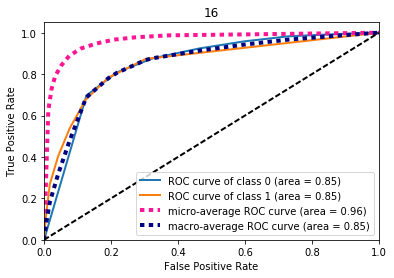

0.155562162399292


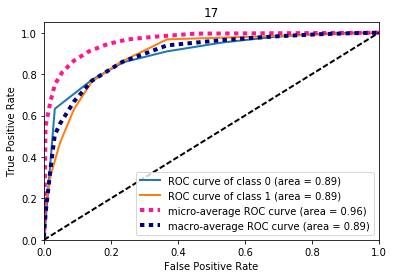

In [43]:
# Trains and tests on cavity flow data
X = cavity_flow.as_matrix()
y = cavity_flow_results.as_matrix()
for i in range(0,18):
    clf = RandomForestClassifier()
    classifier_factory(clf)
    start_time = time.time()
    #clf.plot_confusion_matrix(X, y[:,i])
    clf.plot_roc_curve(X,y[:,i])
    #clf.plot_precision_recall_curve(X,y[:,i])
    print(time.time()-start_time)
    plt.title(i)
    plt.show()

In [5]:
# Ch8 Feature ranking for Cavity flow only
for r in range(0,18):
    print(str(r) + '\n')
    clfLasso = RandomizedLasso()
    clfLasso.fit(cavity_flow,cavity_flow_results.iloc[:,r])
    zipped = sorted(zip(cavity_flow.columns, clfLasso.scores_), 
                    key=lambda x: x[1], reverse=True)
    for i,j in zipped:
        print(i,j)

0

solver_id 1.0
prec_id 1.0
np 0.715
diag_avg 0.505
col_log_val_spread 0.435
num_value_symm_2 0.39
antisymm_frob_norm 0.29
nnz_pattern_symm_2 0.23
StarSTREAM_Triad 0.19
row_log_val_spread 0.17
frob_norm 0.155
symm_frob_norm 0.125
MaxPingPongBandwidth_GBytes 0.08
PTRANS_GBs 0.05
StarSTREAM_Copy 0.045
bogo_mips 0.045
col_var 0.045
one_norm 0.045
NaturallyOrderedRingLatency_usec 0.035
MinPingPongLatency_usec 0.03
StarDGEMM_Gflops 0.02
SingleDGEMM_Gflops 0.02
MinPingPongBandwidth_GBytes 0.02
trace 0.02
abs_trace 0.02
SingleRandomAccess_LCG_GUPs 0.015
MPIFFT_Gflops 0.015
StarRandomAccess_LCG_GUPs 0.01
StarSTREAM_Add 0.01
StarFFT_Gflops 0.01
SingleFFT_Gflops 0.01
RandomlyOrderedRingLatency_usec 0.01
RandomlyOrderedRingBandwidth_GBytes 0.01
MemProc 0.01
antisymm_inf_norm 0.01
MPIRandomAccess_GUPs 0.005
SingleSTREAM_Scale 0.005
SingleSTREAM_Add 0.005
SingleSTREAM_Triad 0.005
MaxPingPongLatency_usec 0.005
AvgPingPongLatency_usec 0.005
rows 0.005
cols 0.005
diag_var 0.005
symm_inf_norm 0.005
HP

prec_id 0.995
solver_id 0.6
StarSTREAM_Triad 0.29
MaxPingPongBandwidth_GBytes 0.205
bogo_mips 0.1
StarSTREAM_Copy 0.095
np 0.095
col_log_val_spread 0.07
PTRANS_GBs 0.065
row_log_val_spread 0.06
num_value_symm_2 0.055
nnz_pattern_symm_2 0.055
diag_avg 0.045
NaturallyOrderedRingLatency_usec 0.04
antisymm_frob_norm 0.04
SingleDGEMM_Gflops 0.035
RandomlyOrderedRingBandwidth_GBytes 0.035
MinPingPongLatency_usec 0.03
StarSTREAM_Add 0.025
StarSTREAM_Scale 0.02
MPIFFT_Gflops 0.02
StarDGEMM_Gflops 0.015
diag_var 0.015
HPL_Tflops 0.01
StarRandomAccess_LCG_GUPs 0.01
SingleSTREAM_Add 0.01
SingleSTREAM_Triad 0.01
rows 0.01
MPIRandomAccess_LCG_GUPs 0.005
MPIRandomAccess_GUPs 0.005
SingleRandomAccess_LCG_GUPs 0.005
StarRandomAccess_GUPs 0.005
SingleRandomAccess_GUPs 0.005
SingleSTREAM_Scale 0.005
StarFFT_Gflops 0.005
MaxPingPongLatency_usec 0.005
RandomlyOrderedRingLatency_usec 0.005
MemProc 0.005
row_var 0.005
frob_norm 0.005
symm_frob_norm 0.005
one_norm 0.005
inf_norm 0.005
symm_inf_norm 0.005
tra

np 0.995
solver_id 0.99
prec_id 0.99
row_log_val_spread 0.705
diag_var 0.34
col_log_val_spread 0.29
antisymm_frob_norm 0.24
frob_norm 0.205
symm_frob_norm 0.12
StarSTREAM_Triad 0.11
trace 0.08
diag_avg 0.075
rows 0.07
MaxPingPongBandwidth_GBytes 0.065
nnz_pattern_symm_2 0.06
cols 0.055
one_norm 0.055
num_value_symm_2 0.055
StarSTREAM_Copy 0.05
PTRANS_GBs 0.045
row_var 0.045
SingleDGEMM_Gflops 0.04
antisymm_inf_norm 0.04
bogo_mips 0.035
col_var 0.035
symm_inf_norm 0.035
abs_trace 0.035
nnz 0.03
NaturallyOrderedRingLatency_usec 0.02
inf_norm 0.02
MPIFFT_Gflops 0.015
MinPingPongLatency_usec 0.015
StarSTREAM_Add 0.01
RandomlyOrderedRingBandwidth_GBytes 0.01
HPL_Tflops 0.005
StarDGEMM_Gflops 0.005
MPIRandomAccess_LCG_GUPs 0.005
MPIRandomAccess_GUPs 0.005
StarRandomAccess_LCG_GUPs 0.005
SingleRandomAccess_GUPs 0.005
SingleSTREAM_Copy 0.005
SingleSTREAM_Scale 0.005
SingleSTREAM_Triad 0.005
AvgPingPongBandwidth_GBytes 0.005
MemProc 0.005
diag_nnz 0.005
lower_bw 0.005
upper_bw 0.005
SingleRando

61.7662889957428


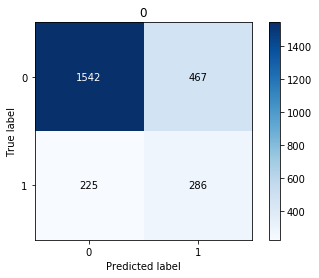

104.39230251312256


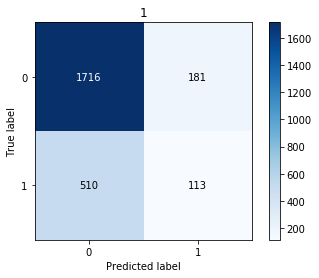

148.9643051624298


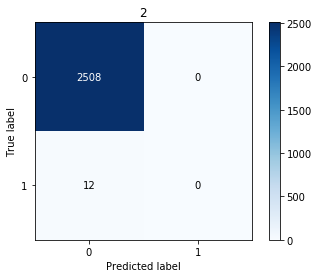

KeyboardInterrupt: 

In [33]:
# Trains on UF matrices w/ random over sampling
#  and tests on cavity_flow data
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler()
for i in range (0,18):
    new_x, new_y = ros.fit_sample(ch8_data.as_matrix(),
                                  ch8_labels.iloc[:,i])
    clf = RandomForestClassifier()
    classifier_factory(clf)
    start_time = time.time()
    clf.fit(new_x, new_y)
    a = pd.DataFrame(clf.predict(cavity_flow))
    skplt.plot_confusion_matrix(cavity_flow_results.iloc[:,i], a)
    print(time.time()-start_time)
    plt.title(i)
    plt.show()